# NFIRS CODE CHECK

This notebook was created to check and clean the NFIRS_2009_2016_geocoded_with_tract.csv Dataset.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
# Change to your filepath to data and uncomment if NFIRS_2009_2016.csv not in the main path 
os.chdir('../Data/Raw')

In [3]:
NFIR = pd.read_csv('NFIRS_2009_2016_geocoded_with_tract.csv',
                   encoding='latin_1',
                   index_col=0,
                   low_memory=False)


#### Null Analysis 

In [4]:
NFIR['X'].isnull().value_counts(normalize = True)

False    0.839821
True     0.160179
Name: X, dtype: float64

 16% of data is not properly geocoded, as long as its uniformly missing it shouldn't affect results drastically.
 
 From the Code below it looks like it is all above  75% accounted for except for West Virginia, which has 60%
 
 Also we can see there were some malformed queries as there are 2 Digit state codes such as CZ,DD and VI.
 

 

In [5]:
MATCH =  NFIR["MATCH"].groupby(NFIR['STATE']).value_counts(normalize = True)

name = 'PERCENT_MATCHED'

MATCH

STATE  MATCH   
AK     Match       0.801001
       No_Match    0.184893
       Tie         0.014106
AL     Match       0.816969
       No_Match    0.173495
       Tie         0.009536
AR     Match       0.747023
       No_Match    0.242545
       Tie         0.010432
AZ     Match       0.842215
       No_Match    0.151805
       Tie         0.005980
CA     Match       0.774357
       No_Match    0.218303
       Tie         0.007340
CO     Match       0.891468
       No_Match    0.098782
       Tie         0.009750
CT     Match       0.929936
       No_Match    0.061672
       Tie         0.008392
CZ     No_Match    1.000000
DC     Match       0.971893
       No_Match    0.027219
       Tie         0.000888
DD     No_Match    1.000000
DE     Match       0.850428
       No_Match    0.135741
       Tie         0.013831
FL     Match       0.793518
                     ...   
SD     No_Match    0.158634
       Tie         0.020493
TN     Match       0.874622
       No_Match    0.118454
    

In [6]:
# Data Cleaning 
 

NFIR = NFIR[~NFIR['X'].isnull()]
NFIR = NFIR[NFIR.STATE.str.match('[A-Z]{2}')]



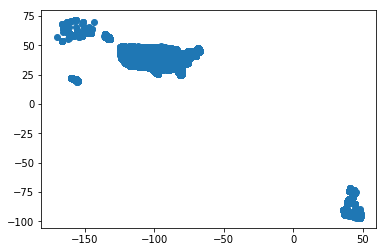

In [7]:
plt.scatter(NFIR['X'].values,NFIR['Y'].values)
plt.show()

 As we can see most of the points form the Continental US, Alaska and hawaii in the correct orientation indicating that most points are in the correct (X,Y) orientation. From looking at the rows it seems as though there are some rows in the form (Y,X)
 since we don't have any visible gaps in the map of the US it does not seem to be a problem that happens at the state level.
 



Considering the fact that our improperly geocoded rows cluster so nicely We should be able to create a criterion to search for them and correct them 



In [8]:
((NFIR['X'] > 0) & (NFIR['Y'] < 0)).value_counts()

False    1630030
True       15247
dtype: int64

In [9]:
# here is the code to swap elements if they appear backwards

NFIR[['X','Y']] = NFIR[['Y','X']].where( (NFIR['X'] > 0) & (NFIR['Y'] < 0), NFIR[['X','Y']].values )

In [10]:
((NFIR['X'] > 0) & (NFIR['Y'] < 0)).value_counts()

False    1645277
dtype: int64

now things are looking much better! 

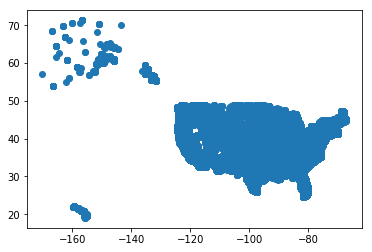

In [11]:
plt.scatter(NFIR['X'].values,NFIR['Y'].values)
plt.show()


In [12]:
NFIR.to_csv('NFIR_Clean.csv',header= True)

In [13]:
NFIR

,ORIGINAL_ADDRESS,MATCH,MATCH_TYPE,MATCHED_ADDRESS,X,Y,TIGER_LINE_ID,TIGER_LINE_SIDE,STATE,state_fips,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT
ID,,,,,,,,,,,,,,,,,
rcp2_id1869,"105 Yellowleaf DR, Enterprise, AL, 36331",Match,Non_Exact,"105 YELLOWLEAF DR, ENTERPRISE, AL, 36330",-85.807050,31.328058,99550660.0,L,AL,1.0,31.0,11202.0,1.031011e+09,112.02,Census Tract 112.02,G5020,S
rcp2_id9391,"464 SHELDON AVE, GRDLY, CA, 95956",Match,Non_Exact,"464 SHELDON AVE, GRIDLEY, CA, 95948",-121.666460,39.350815,636052867.0,R,CA,6.0,7.0,3400.0,6.007003e+09,34.00,Census Tract 34,G5020,S
rcp2_id9392,"11336 YANKEE HILL RD, CONCOW, CA, 95965",Match,Non_Exact,"11336 YANKEE HILL RD, YANKEE HILL, CA, 95965",-121.520836,39.712353,68417518.0,R,CA,6.0,7.0,2400.0,6.007002e+09,24.00,Census Tract 24,G5020,S
rcp2_id9393,"7022 CANA HWY, NORD, CA, 95973",Match,Non_Exact,"7022 CANA HWY, COHASSET, CA, 95973",-122.018745,39.840343,636411206.0,L,CA,6.0,7.0,1400.0,6.007001e+09,14.00,Census Tract 14,G5020,S
rcp2_id9394,"65 QUAIL COVEY CT, NORD, CA, 95973",Match,Non_Exact,"65 QUAIL COVEY CT, COHASSET, CA, 95973",-121.914890,39.813484,68459391.0,L,CA,6.0,7.0,1400.0,6.007001e+09,14.00,Census Tract 14,G5020,S
rcp2_id9395,"454 SILVER LEAF DR, KELLY_RDGE, CA, 95966",Match,Non_Exact,"454 SILVER LEAF DR, OROVILLE, CA, 95966",-121.469340,39.521328,68485561.0,L,CA,6.0,7.0,2602.0,6.007003e+09,26.02,Census Tract 26.02,G5020,S
rcp2_id9396,"13513 UNION CT, MGLA, CA, 95954",Match,Non_Exact,"13513 UNION CT, MAGALIA, CA, 95954",-121.603460,39.800175,68413544.0,L,CA,6.0,7.0,1702.0,6.007002e+09,17.02,Census Tract 17.02,G5020,S
rcp2_id9397,"1943 CUMMINGS LN, DRHM, CA, 95938",Match,Non_Exact,"1943 CUMMINGS LN, DURHAM, CA, 95938",-121.779860,39.657764,68461916.0,R,CA,6.0,7.0,1500.0,6.007002e+09,15.00,Census Tract 15,G5020,S
rcp2_id1861,"237 Wakefield WAY, Enterprise, AL, 36330",Match,Exact,"237 WAKEFIELD WAY, ENTERPRISE, AL, 36330",-85.797386,31.322014,624561096.0,L,AL,1.0,31.0,11202.0,1.031011e+09,112.02,Census Tract 112.02,G5020,S
